# Pixels and Image Filtering 

### 1.1 Import the packages and load the image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
 
#input image 
!gdown --id '1Ty-WbJCUFQmIL7IB4vZbMt25ovTH1_qF' --output TCFSH.jpeg
#using opencv to read and show
img = cv2.imread('./TCFSH.jpeg')
cv2_imshow(img)

Downloading...
From: https://drive.google.com/uc?id=1Ty-WbJCUFQmIL7IB4vZbMt25ovTH1_qF
To: /content/TCFSH.jpeg
100% 298k/298k [00:00<00:00, 42.1MB/s]


### 1.2 Grayscale

Using OpenCV convert original image to grayscale image

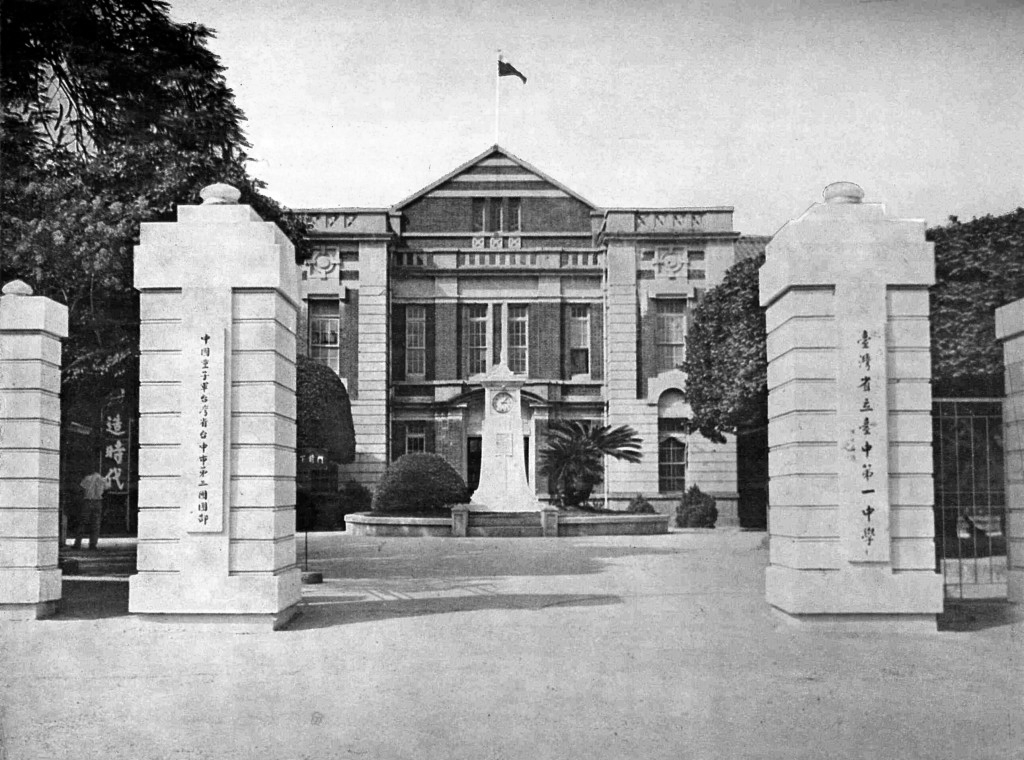

In [ ]:
#using opencv to graysclae image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

### **Sobel Operator**

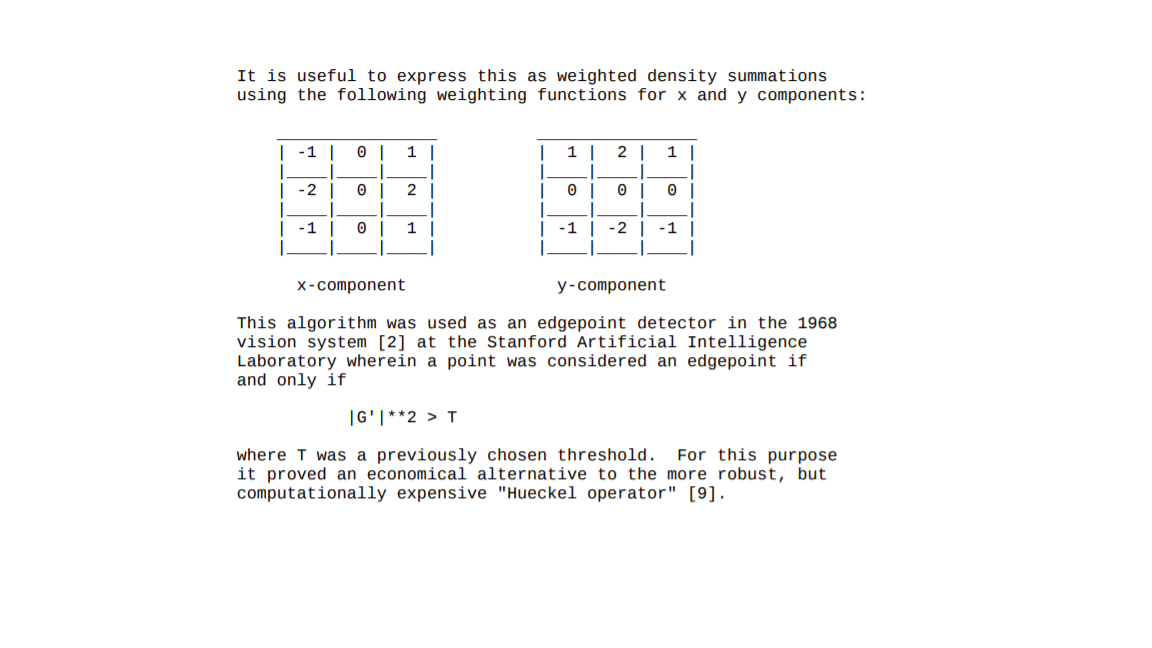

Reference:Sobel, Irwin. (2014). An Isotropic 3x3 Image Gradient Operator. Presentation at Stanford A.I. Project 1968. 


---







### 2.1 Padding



When we are doing image processing, the boundary often encounters problems that cannot be smoothly calculated.

One of solution is using padding to avoid the boundary problem


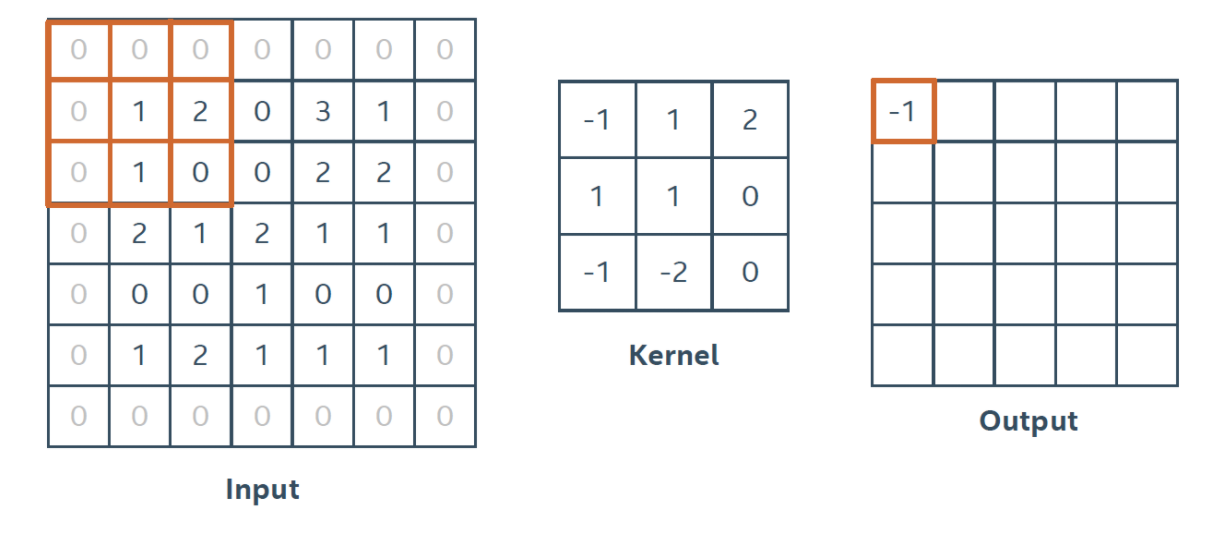

Use numpy to padding the 3*4 sequential matix 

Hint : np.pad ( [input_img] , [width] , 'constant' )

In [ ]:
import numpy as np
#make the numpy array by using np.arange 
pad_array=np.arange(12).reshape(3,4)
print(pad_array)
#using np.pad to padding array with zeros 
#hint:np.pad([input],[padding_width],'constant')
print(np.pad(pad_array,1,'constant'))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  0  0  0  0  0]
 [ 0  0  1  2  3  0]
 [ 0  4  5  6  7  0]
 [ 0  8  9 10 11  0]
 [ 0  0  0  0  0  0]]


### **2.2 Sobel y_component**

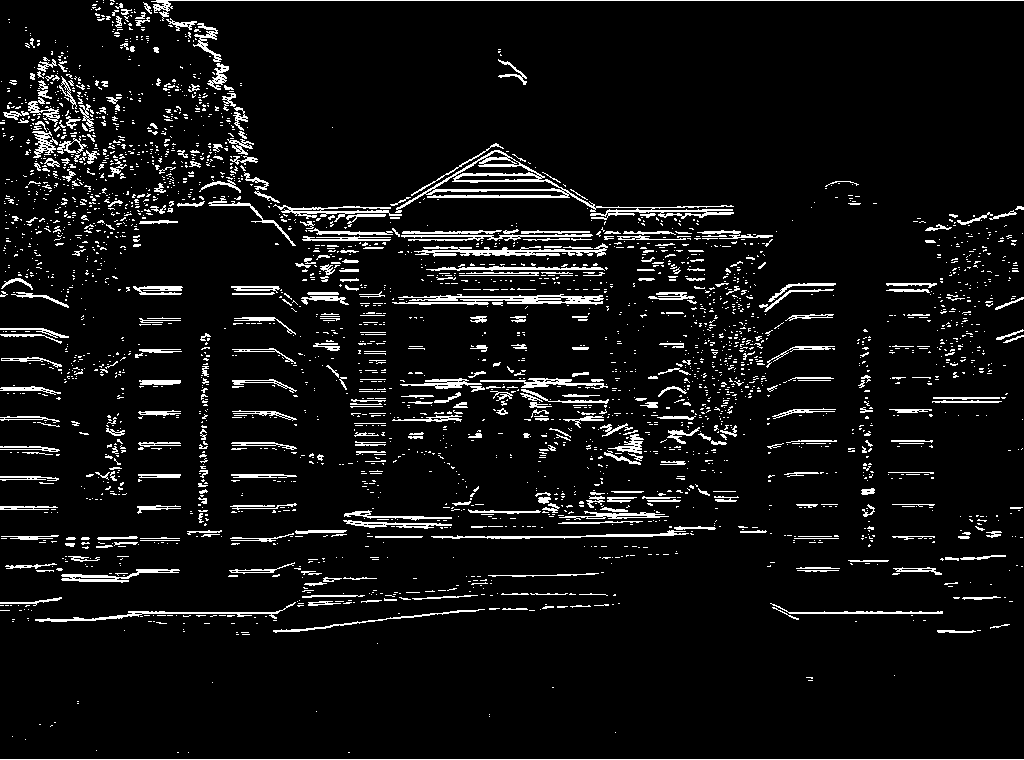

In [ ]:
def sobel_y_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  img_y=np.zeros(input.shape)
  #create the sobel y-component filter
  global sobel_y
  sobel_y=np.array([1,2,1,0,0,0,-1,-2,-1]).reshape(3,3)

  #padding the input image with zeros ann the width equal to the filter center to the boundary
  input_padding=np.pad(input,int(sobel_y.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_y.shape[0]/2),input_padding.shape[0]-int(sobel_y.shape[0]/2)):
    for col in range(int(sobel_y.shape[1]/2),input_padding.shape[1]-int(sobel_y.shape[1]/2)):
      Gy=np.sum(input_padding[row-int(sobel_y.shape[0]/2):row+int(sobel_y.shape[0]/2)+1,
                              col-int(sobel_y.shape[1]/2):col+int(sobel_y.shape[1]/2)+1]*sobel_y)
      
      #compute G
      G=np.sqrt(Gy**2+Gy**2)
      #compare with threshold >T =255 <T =0
      img_y[row-int(sobel_y.shape[0]/2),col-int(sobel_y.shape[1]/2)]= 255 if G > threshold else 0
    
  return img_y
 
cv2_imshow(sobel_y_operator(img,250))

### **2.3 Sobel_x_component**

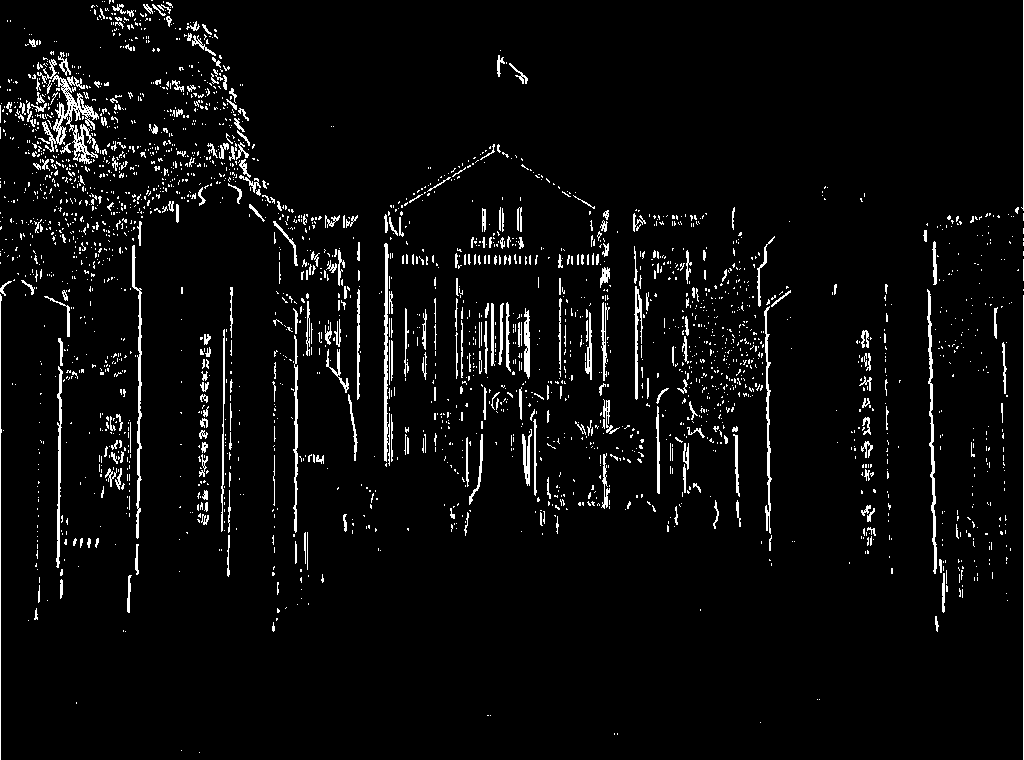

In [ ]:
def sobel_x_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  img_x=np.zeros(input.shape)
  #create the sobel y-component filter
  global sobel_x
  sobel_x=np.transpose(sobel_y)
  #padding
  input_padding=np.pad(input,int(sobel_y.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      Gx=np.sum(input_padding[(row-int(sobel_x.shape[0]/2)):(row+int(sobel_x.shape[0]/2)+1),(col-int(sobel_x.shape[1]/2)):(col+int(sobel_x.shape[1]/2))+1]*sobel_x)
      
      #compute G
      G=np.sqrt(Gx**2+Gx**2)
      #compare with threshold >T =255 <T =0
      img_x[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 255 if G > threshold else 0
    
  return img_x
 
cv2_imshow(sobel_x_operator(img,250))

### **2.4 Sobel**

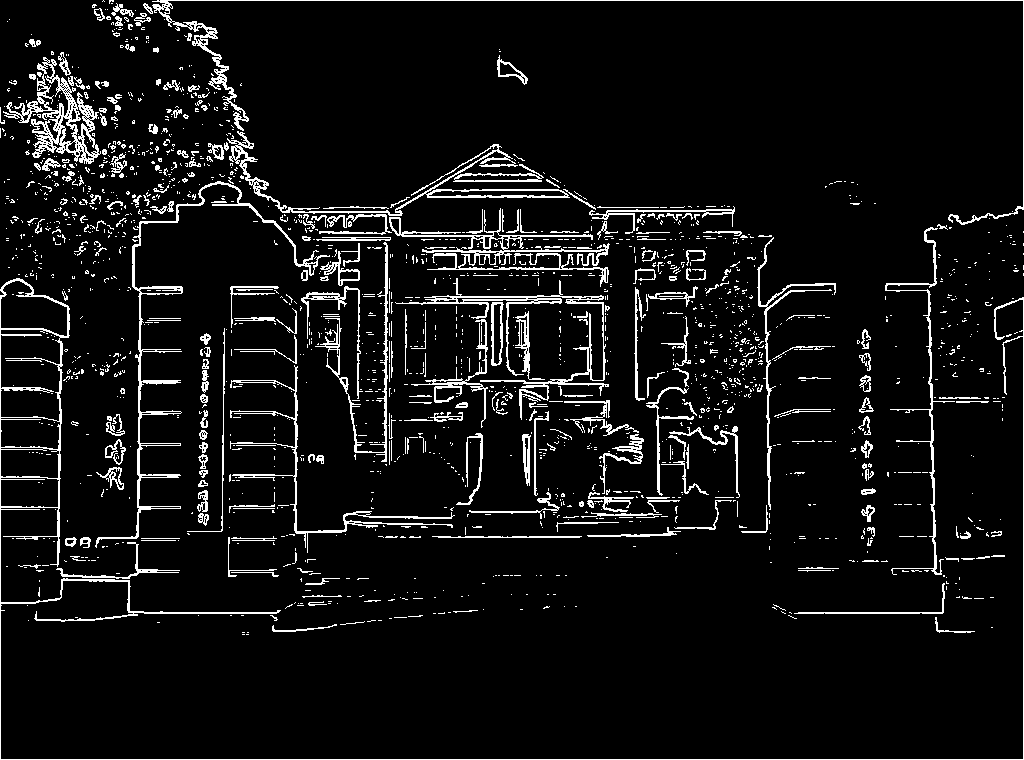

In [ ]:
def sobel_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  img_sobel=np.zeros(input.shape)

  #padding
  input_padding=np.pad(input,int(sobel_y.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      Gx=np.sum(input_padding[(row-int(sobel_x.shape[0]/2)):(row+int(sobel_x.shape[0]/2)+1),(col-int(sobel_x.shape[1]/2)):(col+int(sobel_x.shape[1]/2))+1]*sobel_x)
      Gy=np.sum(input_padding[(row-int(sobel_x.shape[0]/2)):(row+int(sobel_x.shape[0]/2)+1),(col-int(sobel_x.shape[1]/2)):(col+int(sobel_x.shape[1]/2))+1]*sobel_y)
      
      #compute G
      G=np.sqrt(Gx**2+Gy**2)
      #compare with threshold >T =255 <T =0
      img_sobel[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 255 if G > threshold else 0
    
  return img_sobel
 
cv2_imshow(sobel_operator(img,250))

# Bonus

This section has three parts, the first two parts are just to show you how to make Gaussian filter and plot it.

### **Gaussian filter**

Just click run!

In [ ]:
def make_5x5_gaussian_filter (sigma):
  #create 5X5 array as filter
  gaussian_filter=np.zeros([5,5])
  #use gaussian distribution to write filter 
  for row in range (5):
    for col in range (5):
      gaussian_filter[row,col]=1/(2*np.pi*sigma**2)*np.e**(-((col-2)**2+(row-2)**2)/(2*(sigma**2)))
  #normalization
  gaussian_filter=gaussian_filter/np.sum(gaussian_filter)
  #retrun filter
  return gaussian_filter
  print(make_5x5_gaussian_filter(1))

### **Matplotlib**

Just click run!

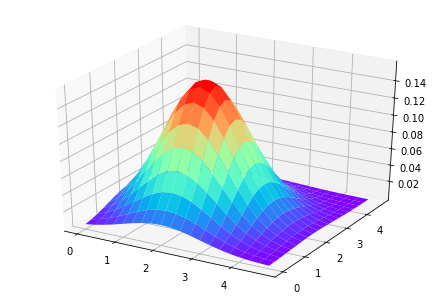

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value 
f=make_5x5_gaussian_filter (1)
X = np.arange(0, f.shape[1], 0.25)
Y = np.arange(0, f.shape[0], 0.25)
X, Y = np.meshgrid(X, Y)    # x-y mesh
sigma=1
# height value
R = 1/(2*np.pi*sigma**2)*np.e**(-((X-2)**2+(Y-2)**2)/(2*(sigma**2)))

ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

### **Gaussian**

Try to do Gaussian filter without fountion
 
Hint:Like Sobel but something different!
 
Notice:Do not just call fountion or you will get zero points

You should show image with Gaussian filter processing after this block

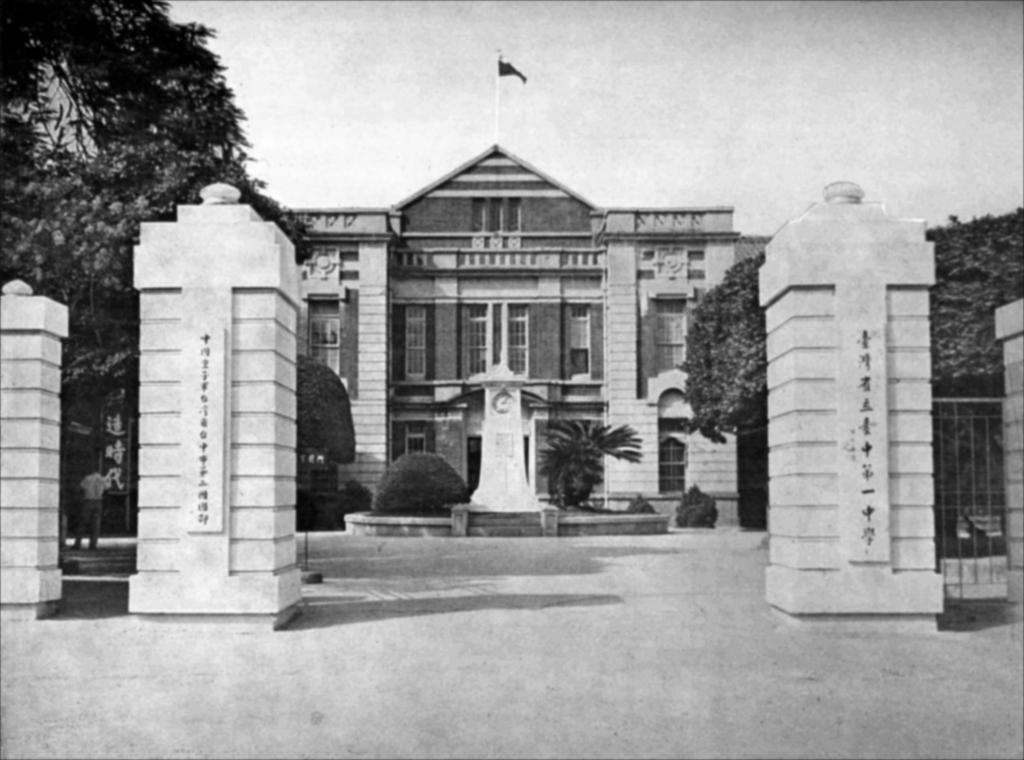

In [ ]:
def gaussian_filter (input,filter):
  #create the numpy zeros array and its shape like input image 
  gau_img=np.zeros(input.shape)

  #padding
  input=np.pad(input,int(filter.shape[0]/2),'constant')

  #do the Gaussian filter and avoid processing outside the boundary
  for row in range(int(filter.shape[0]/2),input.shape[0]-int(filter.shape[0]/2)):
    for col in range(int(filter.shape[1]/2),input.shape[1]-int(filter.shape[1]/2)):
      G=np.sum(input[(row-int(filter.shape[0]/2)):(row+int(filter.shape[0]/2)+1),
                     (col-int(filter.shape[1]/2)):(col+int(filter.shape[1]/2))+1]*filter)
      #put G to new image
      gau_img[row-int(filter.shape[0]/2),col-int(filter.shape[1]/2)]=G

  return gau_img

f=make_5x5_gaussian_filter(1)
print(f)
cv2_imshow(gaussian_filter(img,f))